In [1]:
from sdeint import SdeInt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

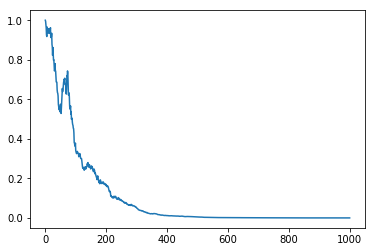

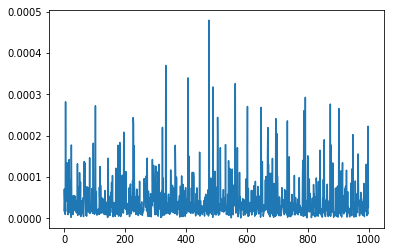

In [2]:
# Geometric Brownian Motion
# S_0 = 1
# dS_t = \mu * S_t dt + \sigma * S_t dW_t
# Solution: S_0 * e^((\mu - \sigma^2/2)*t + \sigma*W_t)
# where W_t ~ N(0,t)

mu = -10
sigma = 1
x_0 = 1
T = 1
n = 1000

def A(x, t):
    return mu*x

def B(x, t):
    return sigma*x

def C(x, t):
    return sigma**2 * x/2

tspan = np.linspace(0, T, 1001)
x_t = np.zeros((len(tspan), n))

for i in range(n):
    x_t[:, i] = SdeInt().Euler(A, B, x_0, tspan)
    
# plot of sample path
plt.figure()
plt.plot(x_t[:,-1])

# plot of final distribution
plt.figure()
plt.plot(x_t[-1,:])

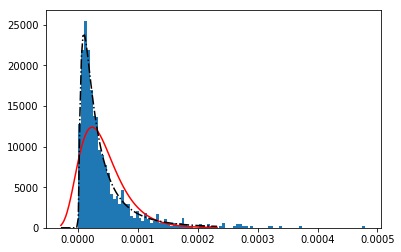

In [3]:
# Need to fit a log-normal of the form above
from scipy.stats import lognorm
x_T = x_t[-1,:]
plt.hist(x_T, density=True, bins=100)
params = lognorm.fit(x_T)
theoretical_params = (sigma*np.sqrt(T), 0, np.exp((mu-sigma**2/2)*T))

x = np.linspace(lognorm.ppf(0.001, *params), lognorm.ppf(0.999, *params), 100)
plt.plot(x, lognorm.pdf(x, *params), 'r-', label='approx lognorm pdf')
plt.plot(x, lognorm.pdf(x, *theoretical_params), 'k-.', label='true lognorm pdf')

In [4]:
# Calcualte errors for Geometric Brownian Motion
true_pdf = lambda x: lognorm.pdf(x, s=1, scale=math.exp(1/2))
approx_pdf = lambda x: lognorm.pdf(x, *params)

print("Weak error: {}".format(abs(lognorm.mean(*theoretical_params)-lognorm.mean(*params))))

Weak error: 3.1649773804557426e-06


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


2.6527942255732764e-05
2.429199656991785e-05
1.6958267131908105e-05
1.254094695685905e-05
8.064003202851176e-06
2.4683428726797247e-06
9.760554163473791e-07
1.727399818848946e-07
4.743389574915193e-08
-3.3966521294334813e-06


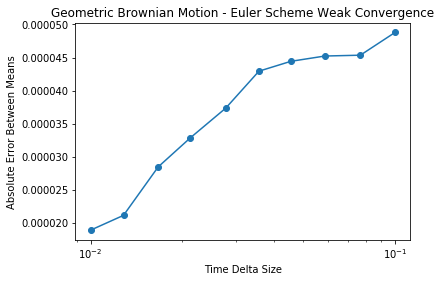

In [5]:
# get plot of errors - GBM Euler Scheme

mu = -10
sigma = 1
x_0 = 1
T = 1 # final time point
n = 1000 # number of sample path
theoretical_params = (sigma*np.sqrt(T), 0, np.exp((mu-sigma**2/2)*T))

strong_errors = []
weak_errors = []
t_points = np.logspace(1,2,10)
t_points = t_points[::-1]
t_points = np.ceil(t_points)

def A(x, t):
    return mu*x

def B(x, t):
    return sigma*x

for t in t_points:
    tspan = np.linspace(0, T, t)
    x_t = np.zeros((len(tspan), n))

    for i in range(n):
        x_t[:, i] = SdeInt().Euler(A, B, x_0, tspan)
        
    x_T = x_t[-1,:]
    params = lognorm.fit(x_T)
    
    true_pdf = lambda x: lognorm.pdf(x, *theoretical_params)
    approx_pdf = lambda x: lognorm.pdf(x, *params)
    print(lognorm.mean(*params))

    weak_errors.append(abs(lognorm.mean(*theoretical_params)-lognorm.mean(*params)))

delta_t = [(T-0)/d for d in t_points]
plt.figure()
plt.title("Geometric Brownian Motion - Euler Scheme Weak Convergence")
plt.xlabel("Time Delta Size")
plt.ylabel("Absolute Error Between Means")
plt.xscale("log")
# y=x
# plt.plot([delta_t[0],delta_t[-1]],[weak_errors[0],weak_errors[0]+delta_t[-1]-delta_t[0]], "k--")
plt.plot(delta_t, weak_errors, "-o")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


4.136127691996898e-05
3.992468026396692e-05
4.206498278446255e-05
4.262051830361264e-05
3.5400051059469464e-05
3.221314159651587e-05
2.051334097879873e-05
1.067433039446969e-05
1.5013669820198574e-06
-8.211718768188461e-07


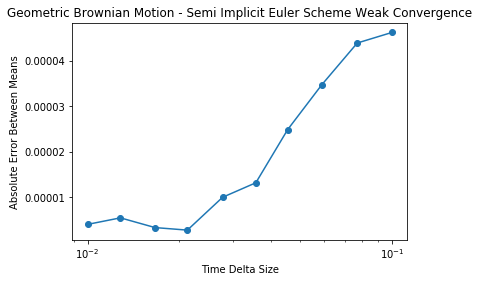

In [6]:
# get plot of errors - GBM Semi Implicit Euler Scheme

mu = -10
sigma = 1
x_0 = 1
T = 1 # final time point
n = 1000 # number of sample path
theoretical_params = (sigma*np.sqrt(T), 0, np.exp((mu-sigma**2/2)*T))

strong_errors = []
weak_errors = []
t_points = np.logspace(1,2,10)
t_points = t_points[::-1]
t_points = np.ceil(t_points)

def A(x, t):
    return mu*x

def B(x, t):
    return sigma*x

def Acorr(x, t):
    return -sigma**2 * x/2

for t in t_points:
    tspan = np.linspace(0, T, t)
    x_t = np.zeros((len(tspan), n))

    for i in range(n):
        x_t[:, i] = SdeInt().SemiEuler(A, B, x_0, tspan, Acorr=Acorr, Ito=True)
        
    x_T = x_t[-1,:]
    params = lognorm.fit(x_T)
    
    true_pdf = lambda x: lognorm.pdf(x, *theoretical_params)
    approx_pdf = lambda x: lognorm.pdf(x, *params)
    print(lognorm.mean(*params))

    weak_errors.append(abs(lognorm.mean(*theoretical_params)-lognorm.mean(*params)))

delta_t = [(T-0)/d for d in t_points]
plt.figure()
plt.title("Geometric Brownian Motion - Semi Implicit Euler Scheme Weak Convergence")
plt.xlabel("Time Delta Size")
plt.ylabel("Absolute Error Between Means")
plt.xscale("log")
# y=x
# plt.plot([delta_t[0],delta_t[-1]],[weak_errors[0],weak_errors[0]+delta_t[-1]-delta_t[0]], "k--")
plt.plot(delta_t, weak_errors, "-o")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


2.714375809653768e-05
2.2651393701855314e-05
1.7401621543584072e-05
1.3740641518060335e-05
8.737657926742527e-06
4.052764604733464e-06
1.3877946139842588e-06
1.5938529176450464e-07
-2.8452646898533592e-09
1.130821769955697e-06


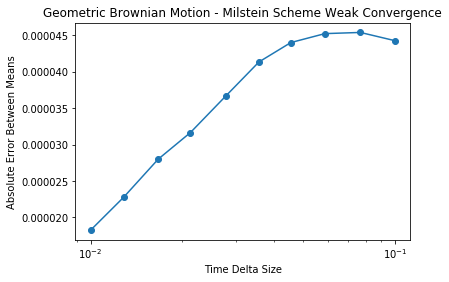

In [7]:
# get plot of errors - GBM Milstein Scheme

mu = -10
sigma = 1
x_0 = 1
T = 1 # final time point
n = 1000 # number of sample path
theoretical_params = (sigma*np.sqrt(T), 0, np.exp((mu-sigma**2/2)*T))

strong_errors = []
weak_errors = []
t_points = np.logspace(1,2,10)
t_points = t_points[::-1]
t_points = np.ceil(t_points)

def A(x, t):
    return mu*x

def B(x, t):
    return sigma*x

def C(x, t):
    return sigma**2 * x/2

for t in t_points:
    tspan = np.linspace(0, T, t)
    x_t = np.zeros((len(tspan), n))

    for i in range(n):
        x_t[:, i] = SdeInt().Milstein(A, B, x_0, tspan, C=C)
        
    x_T = x_t[-1,:]
    params = lognorm.fit(x_T)
    
    true_pdf = lambda x: lognorm.pdf(x, *theoretical_params)
    approx_pdf = lambda x: lognorm.pdf(x, *params)
    print(lognorm.mean(*params))

    weak_errors.append(abs(lognorm.mean(*theoretical_params)-lognorm.mean(*params)))

delta_t = [(T-0)/d for d in t_points]
plt.figure()
plt.title("Geometric Brownian Motion - Milstein Scheme Weak Convergence")
plt.xlabel("Time Delta Size")
plt.ylabel("Absolute Error Between Means")
plt.xscale("log")
# y=x
# plt.plot([delta_t[0],delta_t[-1]],[weak_errors[0],weak_errors[0]+delta_t[-1]-delta_t[0]], "k--")
plt.plot(delta_t, weak_errors, "-o")

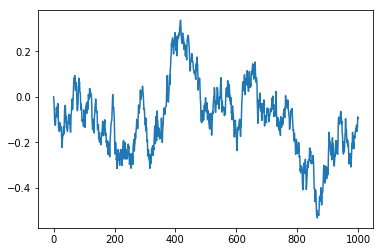

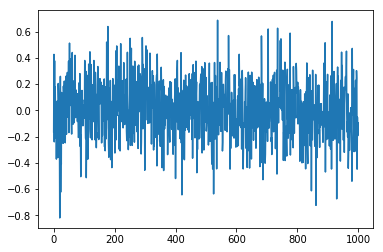

In [8]:
# Ornstein-Uhlenbeck Example
# X_0 = 0
# X_t = -\mu * X_t dt + \sigma dW_t
# Solution: X_t = X_0 e^(-\mu t) + sqrt(\sigma/\mu (1-e^(-2 \mu t))) W_t
# where X_t ~ N(X_0 e^(-\mu t), \sigma/\mu (1-e^(-2 \mu t))

mu = 10
sigma = 1
x_0 = 0
T = 1 # final time point
n = 1000 # number of sample path

def A(x, t):
    return - mu*x

def B(x, t):
    return sigma

def C(x, t):
    return 0

tspan = np.linspace(0, T, 1001)
x_t = np.zeros((len(tspan), n))

for i in range(n):
    x_t[:, i] = SdeInt().Euler(A, B, x_0, tspan)
    
# plot of sample path
plt.figure()
plt.plot(x_t[:,-1])

# plot of final distribution
plt.figure()
plt.plot(x_t[-1,:])

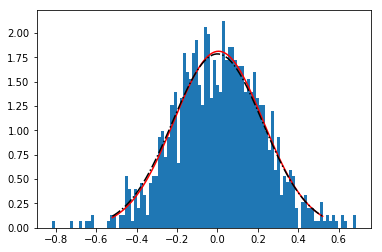

In [9]:
# Need to fit a Normal

from scipy.stats import norm
x_T = x_t[-1,:]
plt.hist(x_T, density=True, bins=100)
params = norm.fit(x_T)
theoretical_params = (x_0*np.exp(-mu*T), (sigma**2/(2*mu) *(1-np.exp(-2*mu*T)))**(1/2))

x = np.linspace(norm.ppf(0.01 , *theoretical_params), norm.ppf(0.99, *theoretical_params), 100)
plt.plot(x, norm.pdf(x, *params), 'r-', label='approx norm pdf')
plt.plot(x, norm.pdf(x, *theoretical_params), 'k-.', label='true norm pdf')

In [10]:
# Calcualte errors for other equation
true_pdf = lambda x: norm.pdf(x, *theoretical_params)
approx_pdf = lambda x: norm.pdf(x, *params)

print("Weak error: {}".format(abs(norm.mean(*theoretical_params)-norm.mean(*params))))

Weak error: 0.005366992093891786


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


3660.0048115648947
3655.6714781878695
3647.240917302315
3638.710413844054
3625.988087167855
3610.1527790310956
3588.9134213266425
3560.8526834252984
3519.76208519635
3464.7123055011866


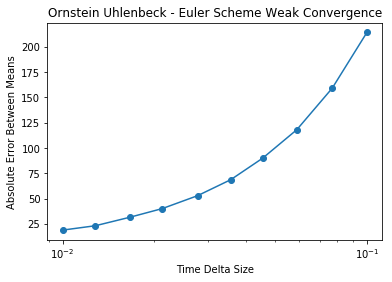

In [11]:
# get plot of errors - OU Euler Scheme

mu = 1
sigma = 10
x_0 = 10000
T = 1 # final time point
n = 100 # number of sample path
theoretical_params = (x_0*np.exp(-mu*T), (sigma**2/(2*mu) *(1-np.exp(-2*mu*T)))**(1/2))

strong_errors = []
weak_errors = []
t_points = np.logspace(1,2,10)
t_points = t_points[::-1]
t_points = np.ceil(t_points)

def A(x, t):
    return -mu*x

def B(x, t):
    return sigma

for t in t_points:
    tspan = np.linspace(0, T, t)
    x_t = np.zeros((len(tspan), n))

    for i in range(n):
        x_t[:, i] = SdeInt().Euler(A, B, x_0, tspan)
        
    x_T = x_t[-1,:]
    params = norm.fit(x_T)
    
    true_pdf = lambda x: norm.pdf(x, *theoretical_params)
    approx_pdf = lambda x: norm.pdf(x, *params)
    print(norm.mean(*params))

    weak_errors.append(abs(norm.mean(*theoretical_params)-norm.mean(*params)))

delta_t = [(T-0)/d for d in t_points]
plt.figure()
plt.title("Ornstein Uhlenbeck - Euler Scheme Weak Convergence")
plt.xlabel("Time Delta Size")
plt.ylabel("Absolute Error Between Means")
plt.xscale("log")
# y=x
# plt.plot([delta_t[0],delta_t[-1]],[weak_errors[0],weak_errors[0]+delta_t[-1]-delta_t[0]], "k--")
plt.plot(delta_t, weak_errors, "-o")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


3679.7423412885105
3679.3760642420425
3679.4462580409413
3679.2068488859286
3678.745495529269
3678.926485233822
3678.184927874974
3677.638727923814
3675.2604310095276
3674.642364389244


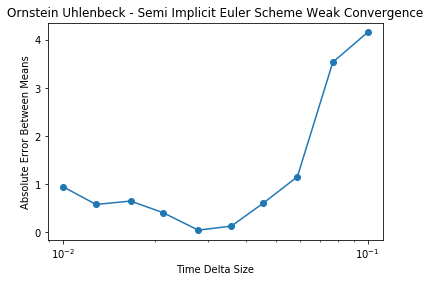

In [12]:
# get plot of errors - OU Semi Implicit Euler Scheme

mu = 1
sigma = 10
x_0 = 10000
T = 1 # final time point
n = 100 # number of sample path
theoretical_params = (x_0*np.exp(-mu*T), (sigma**2/(2*mu) *(1-np.exp(-2*mu*T)))**(1/2))

strong_errors = []
weak_errors = []
t_points = np.logspace(1,2,10)
t_points = t_points[::-1]
t_points = np.ceil(t_points)

def A(x, t):
    return - mu*x

def B(x, t):
    return sigma

def Acorr(x, t):
    return 0

for t in t_points:
    tspan = np.linspace(0, T, t)
    x_t = np.zeros((len(tspan), n))

    for i in range(n):
        x_t[:, i] = SdeInt().SemiEuler(A, B, x_0, tspan, Acorr=Acorr, Ito=True)
        
    x_T = x_t[-1,:]
    params = norm.fit(x_T)
    
    true_pdf = lambda x: norm.pdf(x, *theoretical_params)
    approx_pdf = lambda x: norm.pdf(x, *params)
    print(norm.mean(*params))

    weak_errors.append(abs(norm.mean(*theoretical_params)-norm.mean(*params)))

delta_t = [(T-0)/d for d in t_points]
plt.figure()
plt.title("Ornstein Uhlenbeck - Semi Implicit Euler Scheme Weak Convergence")
plt.xlabel("Time Delta Size")
plt.ylabel("Absolute Error Between Means")
plt.xscale("log")
# y=x
# plt.plot([delta_t[0],delta_t[-1]],[weak_errors[0],weak_errors[0]+delta_t[-1]-delta_t[0]], "k--")
plt.plot(delta_t, weak_errors, "-o")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


3660.618110273711
3654.9310825524417
3647.2803664485727
3638.5164388547732
3625.322568249679
3610.0715628126454
3589.5183001242826
3560.5856492725097
3519.9552754952833
3464.228196800011


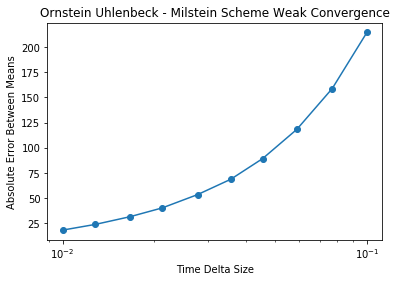

In [13]:
# get plot of errors - OU Milstein Scheme

mu = 1
sigma = 10
x_0 = 10000
T = 1 # final time point
n = 100 # number of sample path
theoretical_params = (x_0*np.exp(-mu*T), (sigma**2/(2*mu) *(1-np.exp(-2*mu*T)))**(1/2))

strong_errors = []
weak_errors = []
t_points = np.logspace(1,2,10)
t_points = t_points[::-1]
t_points = np.ceil(t_points)

def A(x, t):
    return - mu*x

def B(x, t):
    return sigma

def C(x, t):
    return 0

for t in t_points:
    tspan = np.linspace(0, T, t)
    x_t = np.zeros((len(tspan), n))

    for i in range(n):
        x_t[:, i] = SdeInt().Milstein(A, B, x_0, tspan, C=C)
        
    x_T = x_t[-1,:]
    params = norm.fit(x_T)
    
    true_pdf = lambda x: norm.pdf(x, *theoretical_params)
    approx_pdf = lambda x: norm.pdf(x, *params)
    print(norm.mean(*params))

    weak_errors.append(abs(norm.mean(*theoretical_params)-norm.mean(*params)))

delta_t = [(T-0)/d for d in t_points]
plt.figure()
plt.title("Ornstein Uhlenbeck - Milstein Scheme Weak Convergence")
plt.xlabel("Time Delta Size")
plt.ylabel("Absolute Error Between Means")
plt.xscale("log")
# y=x
# plt.plot([delta_t[0],delta_t[-1]],[weak_errors[0],weak_errors[0]+delta_t[-1]-delta_t[0]], "k--")
plt.plot(delta_t, weak_errors, "-o")